In [2]:
#%pip3 install --upgrade numpy
#%pip3 install --upgrade pandas
#%pip3 install --upgrade matplotlib
#%pip3 install --upgrade yfinance
#%pip3 install --upgrade scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import normalize, StandardScaler
import mpt.data as data
%load_ext autoreload
%autoreload 2

In [4]:
# Top 100 from S&P 500
# IMPORTANT! Needs to be sorted because yfinance returns a sorted dataframe
t = sorted([
    'AAPL',
    'MSFT',
    'AMZN',
    'NVDA',
    'GOOGL',
    'BRK-B',
    'GOOG',
    'META',
    'TSLA',
    'UNH',
    'XOM',
    'JNJ',
    'JPM',
    'V',
    'PG',
    'LLY',
    'MA',
    'MRK',
    'HD',
    'CVX',
    'PEP',
    'AVGO',
    'ABBV',
    'KO',
    'COST',
    'MCD',
    'PFE',
    'WMT',
    'TMO',
    'CRM',
    'ABT',
    'BAC',
    'CSCO',
    'DIS',
    'LIN',
    'CMCSA',
    'ACN',
    'VZ',
    'NKE',
    'ADBE',
    'DHR',
    'AMD',
    'NEE',
    'TXN',
    'ORCL',
    'PM',
    'NFLX',
    'WFC',
    'BMY',
    'RTX',
    'HON',
    'INTC',
    'UPS',
    'AMGN',
    'COP',
    'LOW',
    'SBUX',
    'UNP',
    'T',
    'QCOM',
    'INTU',
    'MDT',
    'PLD',
    'SPGI',
    'CAT',
    'IBM',
    'ELV',
    'BA',
    'GS',
    'MS',
    'GE',
    'MDLZ',
    'ISRG',
    'DE',
    'LMT',
    'BKNG',
    'GILD',
    'AMAT',
    'SYK',
    'BLK',
    'ADI',
    'AXP',
    'TJX',
    'AMT',
    'C',
    'CVS',
    'MMC',
    'NOW',
    'ADP',
    'VRTX',
    'ZTS',
    'PYPL',
    'TMUS',
    'MO',
    'CB',
    'SO',
    'REGN',
    'CI',
    'PGR',
    'DUK',
])
f=data.Frequency.D
y=10
ts=data.MultiTimeSeries(t, years=y, frequency=f)
df=ts.history()

[*********************100%***********************]  100 of 100 completed


In [32]:
df_ret = df.Return.dropna()
df_ret

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,...,UNH,UNP,UPS,V,VRTX,VZ,WFC,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,-0.002460,0.004984,0.009449,0.013766,0.001118,-0.003302,0.002969,-0.005190,-0.153846,0.005761,...,-0.011952,0.015586,0.008691,-0.005138,-0.010479,0.004464,-0.003366,0.017372,0.004120,-0.010744
2015-07-08,-0.024823,-0.013127,-0.019120,-0.010742,-0.007445,-0.022720,-0.012829,-0.032342,-0.038277,-0.019821,...,-0.015907,-0.019337,-0.020615,-0.015345,-0.046596,-0.002570,-0.017778,-0.009893,-0.010861,-0.029240
2015-07-09,-0.020397,0.004581,-0.001218,0.001332,0.006001,-0.016952,0.008247,-0.001617,-0.014925,-0.006566,...,0.004715,0.004173,0.002723,0.004795,-0.005348,-0.006870,0.004525,-0.003832,-0.004514,0.001936
2015-07-10,0.026734,0.018538,0.015044,0.010537,0.001491,0.010182,0.010286,0.013499,-0.010101,0.018439,...,0.023546,0.016312,0.012637,0.020433,0.017040,0.015997,0.010450,0.004672,0.007598,0.008374
2015-07-13,0.019306,0.012369,0.000604,0.017919,0.010547,0.005853,0.002576,0.028769,0.000000,0.010772,...,0.002456,-0.007565,0.008250,0.016077,0.010492,0.004255,0.011769,0.010394,0.002433,0.001704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05,0.046927,0.004547,0.003608,-0.003190,0.037430,0.011360,0.007811,0.032103,0.037294,0.020009,...,0.014365,0.021161,0.014138,0.027394,0.004328,0.012851,0.033224,0.008640,0.024896,0.043481
2023-05-08,-0.000403,-0.003918,-0.003236,-0.003124,-0.012457,0.006162,-0.005615,-0.002671,0.057881,-0.008075,...,-0.003358,-0.006411,-0.007682,0.001941,-0.011491,0.000000,0.011597,0.006259,0.003957,-0.007303
2023-05-09,-0.009971,-0.004205,-0.005861,-0.005060,-0.004098,-0.026555,-0.002847,-0.016501,0.000210,-0.000810,...,-0.004547,0.003251,-0.007913,0.004435,0.002151,-0.006873,0.004169,0.001702,0.000275,-0.002705


In [35]:
cov = df_ret.cov()
cov

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,...,UNH,UNP,UPS,V,VRTX,VZ,WFC,WMT,XOM,ZTS
AAPL,0.000359,0.000103,0.000151,0.000182,0.000253,0.000231,0.000163,0.000292,0.000323,0.000127,...,0.000143,0.000148,0.000143,0.000188,0.000164,0.000063,0.000153,0.000088,0.000120,0.000165
ABBV,0.000103,0.000302,0.000123,0.000106,0.000118,0.000111,0.000103,0.000142,0.000132,0.000141,...,0.000130,0.000095,0.000087,0.000112,0.000161,0.000060,0.000117,0.000057,0.000100,0.000124
ABT,0.000151,0.000123,0.000246,0.000148,0.000172,0.000154,0.000137,0.000183,0.000209,0.000134,...,0.000139,0.000112,0.000114,0.000144,0.000163,0.000073,0.000127,0.000076,0.000083,0.000156
ACN,0.000182,0.000106,0.000148,0.000261,0.000214,0.000192,0.000177,0.000238,0.000237,0.000112,...,0.000132,0.000153,0.000135,0.000182,0.000140,0.000075,0.000175,0.000079,0.000126,0.000159
ADBE,0.000253,0.000118,0.000172,0.000214,0.000447,0.000255,0.000186,0.000319,0.000368,0.000131,...,0.000143,0.000143,0.000156,0.000218,0.000190,0.000055,0.000142,0.000090,0.000097,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.000063,0.000060,0.000073,0.000075,0.000055,0.000063,0.000086,0.000066,0.000076,0.000068,...,0.000075,0.000067,0.000064,0.000068,0.000063,0.000143,0.000091,0.000060,0.000076,0.000063
WFC,0.000153,0.000117,0.000127,0.000175,0.000142,0.000197,0.000175,0.000241,0.000197,0.000118,...,0.000150,0.000188,0.000152,0.000183,0.000123,0.000091,0.000430,0.000074,0.000219,0.000128
WMT,0.000088,0.000057,0.000076,0.000079,0.000090,0.000076,0.000077,0.000098,0.000095,0.000075,...,0.000076,0.000062,0.000079,0.000068,0.000073,0.000060,0.000074,0.000193,0.000056,0.000072
XOM,0.000120,0.000100,0.000083,0.000126,0.000097,0.000153,0.000134,0.000185,0.000146,0.000088,...,0.000121,0.000154,0.000112,0.000141,0.000097,0.000076,0.000219,0.000056,0.000348,0.000092


## PCA Analysis


Component 1 
Fraction of total variance explained by this variable: 0.4325869840019932 
 Total fraction of variance explained by the first 1 variable(s): 0.4325869840019932

Component 2 
Fraction of total variance explained by this variable: 0.05704049262766089 
 Total fraction of variance explained by the first 2 variable(s): 0.48962747662965406

Component 3 
Fraction of total variance explained by this variable: 0.04687590326781599 
 Total fraction of variance explained by the first 3 variable(s): 0.5365033798974701

Component 4 
Fraction of total variance explained by this variable: 0.02684562175685473 
 Total fraction of variance explained by the first 4 variable(s): 0.5633490016543248

Component 5 
Fraction of total variance explained by this variable: 0.018137473806130157 
 Total fraction of variance explained by the first 5 variable(s): 0.581486475460455

Component 6 
Fraction of total variance explained by this variable: 0.014837149066979038 
 Total fraction of variance explai

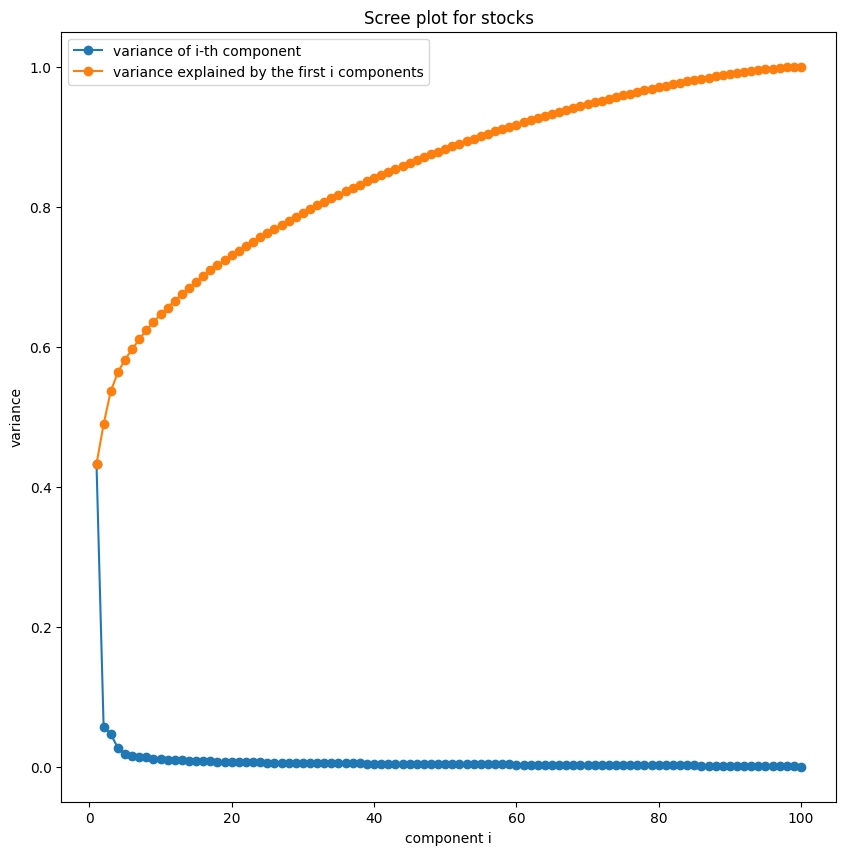

In [23]:
# First we pre-process the data
scaler = StandardScaler().fit(df_ret)
df_scaled = scaler.transform(df_ret)
#df_scaled_nonan = df_scaled[~np.isnan(df_scaled).any(axis=1), :]

# then we perform the same tests as before
n_components = 100
pca_scaled = PCA(n_components).fit(df_scaled)
var_scaled = pca_scaled.explained_variance_ratio_
var_scaled_explained = np.zeros(n_components)
for i in range(n_components):
    var_scaled_explained[i] = sum(var_scaled[:i+1])

for i in range(n_components):
    print("\nComponent", i+1 , "\nFraction of total variance explained by this variable:", var_scaled[i],
            "\n Total fraction of variance explained by the first %s variable(s):" % (i +1), var_scaled_explained[i] )

plt.figure(figsize = (10,10))
plt.plot(range(1, len(var_scaled_explained)+1), var_scaled, label = "variance of i-th component", marker = "o")
plt.plot(range(1, len(var_scaled_explained)+1), var_scaled_explained, label = "variance explained by the first i components", marker = "o")
plt.xlabel("component i")
plt.ylabel("variance")
plt.title("Scree plot for stocks")
plt.legend()
plt.show()

In [47]:
# stocks_scaled = df_ret.columns[np.argsort(pca_scaled.components_[0])[-1:-6:-1]]
stocks_scaled = df_ret.columns[np.argsort(np.abs(pca_scaled.components_[0]))[-1:-6:-1]]
print("Largest 5 contributors to the principal component of preprocessed data:", stocks_scaled)

Largest 5 contributors to the principal component of preprocessed data: Index(['BRK-B', 'BLK', 'ACN', 'V', 'MA'], dtype='object')


In [46]:
pca_scaled.components_[0]

array([-0.1091878 , -0.07841502, -0.10749917, -0.12357153, -0.10519702,
       -0.11066345, -0.12034809, -0.10650464, -0.07192626, -0.09206022,
       -0.09424857, -0.08775437, -0.10538186, -0.11192496, -0.09681496,
       -0.11299795, -0.09747805, -0.12446988, -0.07397158, -0.12754092,
       -0.11384515, -0.09996005, -0.10423344, -0.0909365 , -0.09909652,
       -0.0843296 , -0.09129415, -0.0973855 , -0.11180584, -0.08489775,
       -0.09814952, -0.09644499, -0.10483533, -0.10132802, -0.08476101,
       -0.09308765, -0.088343  , -0.0726636 , -0.10762428, -0.10810224,
       -0.11511464, -0.11360483, -0.1214621 , -0.10349204, -0.10308574,
       -0.11387315, -0.10688322, -0.09505377, -0.11623223, -0.10237383,
       -0.11337976, -0.07505235, -0.0859536 , -0.1027335 , -0.12236488,
       -0.10126355, -0.10289401, -0.10676512, -0.08576552, -0.11747817,
       -0.076778  , -0.08458642, -0.11900444, -0.11902526, -0.08674029,
       -0.06896615, -0.10010118, -0.09097186, -0.09341334, -0.10

## K-means clustering

In [ ]:
# https://www.digitalocean.com/community/tutorials/normalize-data-in-python
cov = normalize(cov, axis=0)

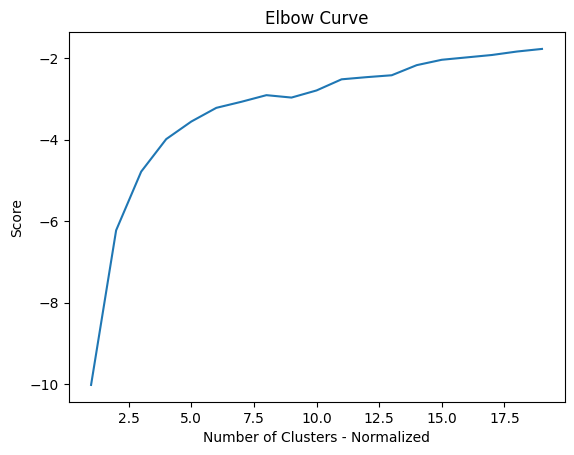

In [ ]:
N = range(1, 20)
kmeans = []
for i in N:
    kmeans.append(KMeans(n_clusters = i, n_init='auto'))

score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(cov).score(cov))
    
plt.plot(N,score)
plt.xlabel('Number of Clusters - Normalized')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show() 

In [44]:
c=8

# Apply K-means clustering using the covariance matrix
km = KMeans(n_clusters=3, n_init='auto').fit(cov)

# Get the cluster labels for each stock
cov = pd.DataFrame(cov, columns=t, index=t)
cov['cluster'] = km.labels_
cov.cluster

AAPL    0
ABBV    2
ABT     2
ACN     1
ADBE    0
       ..
VZ      2
WFC     1
WMT     2
XOM     1
ZTS     2
Name: cluster, Length: 100, dtype: int32

In [45]:
x = cov.cluster
x[x==2]

ABBV     2
ABT      2
AMGN     2
AMT      2
BMY      2
BRK-B    2
CB       2
CI       2
CMCSA    2
COST     2
CVS      2
DHR      2
DUK      2
ELV      2
GILD     2
IBM      2
JNJ      2
KO       2
LLY      2
LMT      2
MCD      2
MDLZ     2
MDT      2
MMC      2
MO       2
MRK      2
NEE      2
ORCL     2
PEP      2
PFE      2
PG       2
PGR      2
PLD      2
PM       2
REGN     2
SO       2
T        2
TMO      2
TMUS     2
UNH      2
UPS      2
VRTX     2
VZ       2
WMT      2
ZTS      2
Name: cluster, dtype: int32